In [1]:
# imports
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from scipy import stats

sns.set_theme()

In [2]:
# CO CSV files
co_ma_data = pd.read_csv('./Data/EPA/CO/CO_MA_SUFFOLK.csv')
co_dc_data = pd.read_csv('./Data/EPA/CO/CO_DC.csv')
co_ny_data = pd.read_csv('./Data/EPA/CO/CO_NY_NY.csv')
co_pa_data = pd.read_csv('./Data/EPA/CO/CO_PA_PHILLY.csv')

combined_co_data = pd.concat([co_ma_data, co_dc_data, co_ny_data, co_pa_data], ignore_index=True)

# NO2 CSV files
no2_ma_data = pd.read_csv('./Data/EPA/NO2/NO2_MA_SUFFOLK.csv')
no2_dc_data = pd.read_csv('./Data/EPA/NO2/NO2_DC.csv')
no2_ny_data = pd.read_csv('./Data/EPA/NO2/NO2_NY_BRONX.csv')
no2_pa_data = pd.read_csv('./Data/EPA/NO2/NO2_PA_Philly.csv')

# Fix NO2 New York data
no2_ny_data.loc[no2_ny_data['County'] == 'Bronx', 'County'] = 'New York'

# Concatenate
combined_no2_data = pd.concat([no2_ma_data, no2_dc_data, no2_ny_data, no2_pa_data], ignore_index=True)

# Ozone CSV files
ozone_ma_data = pd.read_csv('./Data/EPA/Ozone/OZONE_MA_SUFFOLK.csv')
ozone_dc_data = pd.read_csv('./Data/EPA/Ozone/OZONE_DC.csv')
ozone_ny_data = pd.read_csv('./Data/EPA/Ozone/OZONE_NY_NY.csv')
ozone_pa_data = pd.read_csv('./Data/EPA/Ozone/OZONE_PA.csv')

# Concatenate
combined_ozone_data = pd.concat([ozone_ma_data, ozone_dc_data, ozone_ny_data, ozone_pa_data], ignore_index=True)

# PM2.5 CSV files
pm_ma_data = pd.read_csv('./Data/EPA/PM2.5/PM2.5_MA_SUFFOLK.csv')
pm_dc_data = pd.read_csv('./Data/EPA/PM2.5/PM2.5_DC.csv')
pm_ny_data = pd.read_csv('./Data/EPA/PM2.5/PM2.5_NY_NY.csv')
pm_pa_data = pd.read_csv('./Data/EPA/PM2.5/PM2.5_PA_Philly.csv')

# Concatenate
combined_pm25_data = pd.concat([pm_ma_data, pm_dc_data, pm_ny_data, pm_pa_data], ignore_index=True)

In [3]:
print(combined_co_data.columns)
print(combined_no2_data.columns)
print(combined_ozone_data.columns)
print(combined_pm25_data.columns)


Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Max 8-hour CO Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')
Index(['Date', 'Source', 'Site ID', 'POC',
       'Daily Max 1-hour NO2 Concentration', 'Units', 'Daily AQI Value',
       'Local Site Name', 'Daily Obs Count', 'Percent Complete',
       'AQS Parameter Code', 'AQS Parameter Description', 'Method Code',
       'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')
Index(['Date', 'Source', 'Site ID', 'POC',
       'Daily Max 8-hour Ozone Concentration', 'Units', 'Daily AQI Value',
       'Local Site Name', 'Daily Obs Count', 'Percent Complete',
     

In [4]:
# Counties of interest
counties_of_interest = ['Suffolk', 'District of Columbia', 'New York', 'Philadelphia']

def clean_and_save_data(data, pollutant):
    columns_to_drop = [
        'Source', 'Site ID', 'POC', 'Local Site Name', 'Daily Obs Count', 
        'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description', 
        'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 
        'County FIPS Code', 'Site Longitude', 'Site Latitude'
    ]
    
    cleaned_data = data.drop(columns=columns_to_drop, errors='ignore')
    
    # Filter for specific counties
    filtered_data = cleaned_data[cleaned_data['County'].isin(counties_of_interest)]
    
    output_path = f'./Data/EPA/{pollutant}/combined_{pollutant.lower()}_data.csv'
    filtered_data.to_csv(output_path, index=False)
    return pd.read_csv(output_path)

co_data = clean_and_save_data(combined_co_data, 'CO')
no2_data = clean_and_save_data(combined_no2_data, 'NO2')
ozone_data = clean_and_save_data(combined_ozone_data, 'Ozone')
pm25_data = clean_and_save_data(combined_pm25_data, 'PM2.5')

In [5]:
print(combined_co_data.columns)
print(combined_no2_data.columns)
print(combined_ozone_data.columns)
print(combined_pm25_data.columns)


Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Max 8-hour CO Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')
Index(['Date', 'Source', 'Site ID', 'POC',
       'Daily Max 1-hour NO2 Concentration', 'Units', 'Daily AQI Value',
       'Local Site Name', 'Daily Obs Count', 'Percent Complete',
       'AQS Parameter Code', 'AQS Parameter Description', 'Method Code',
       'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')
Index(['Date', 'Source', 'Site ID', 'POC',
       'Daily Max 8-hour Ozone Concentration', 'Units', 'Daily AQI Value',
       'Local Site Name', 'Daily Obs Count', 'Percent Complete',
     

In [6]:
# Concatenate datasets if they have consistent columns
combined_pm25_data['Date'] = pd.to_datetime(combined_pm25_data['Date']) #  date to datetime 
pm25_data = combined_pm25_data.sort_values(by='Date') # Sort by date

columns_to_drop = ['Source', 'POC', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code',
                   'AQS Parameter Description', 'Method Code', 'Method Description',
                   'CBSA Code', 'CBSA Name', 'Site Longitude', 'Site Latitude', 'County FIPS Code', 
                  'State FIPS Code', 'Site ID', 'Local Site Name']

pm25_data = pm25_data.drop(columns_to_drop, axis=1)

In [7]:
def process_data(df, pollutant, counties):
    concentration_columns = {
        'CO': 'Daily Max 8-hour CO Concentration',
        'NO2': 'Daily Max 1-hour NO2 Concentration',
        'Ozone': 'Daily Max 8-hour Ozone Concentration',
        'PM2.5': 'Daily Mean PM2.5 Concentration'
    }
    
    if pollutant not in concentration_columns:
        raise ValueError(f"Unknown pollutant: {pollutant}")
    
    conc_col = concentration_columns[pollutant]
    
    # Create a copy of the dataframe first
    working_df = df.copy()
    
    # Convert dates and rename Suffolk to Boston before filtering
    working_df['Date'] = pd.to_datetime(working_df['Date'])
    working_df.loc[working_df['County'] == 'Suffolk', 'County'] = 'Boston'
    
    # Now filter with date range and counties
    start_date = pd.to_datetime('2023-05-24')
    end_date = pd.to_datetime('2023-06-21')
    
    filtered_df = working_df[
        (working_df['Date'] >= start_date) & 
        (working_df['Date'] <= end_date) & 
        (working_df['County'].isin(['Boston', 'District of Columbia', 'New York', 'Philadelphia']))
    ]

    filtered_df = filtered_df.rename(columns={conc_col: 'Concentration'})
    filtered_df['Pollutant'] = pollutant
    filtered_df['Measurement'] = conc_col
    
    return filtered_df.sort_values('Date')

# Process each dataset
co_processed = process_data(co_data, 'CO', counties_of_interest)
no2_processed = process_data(no2_data, 'NO2', counties_of_interest)
ozone_processed = process_data(ozone_data, 'Ozone', counties_of_interest)
pm25_processed = process_data(pm25_data, 'PM2.5', counties_of_interest)

# Combine all processed datasets
combined_data = pd.concat([co_processed, no2_processed, ozone_processed, pm25_processed], ignore_index=True)

# Your existing plotting code will work after this

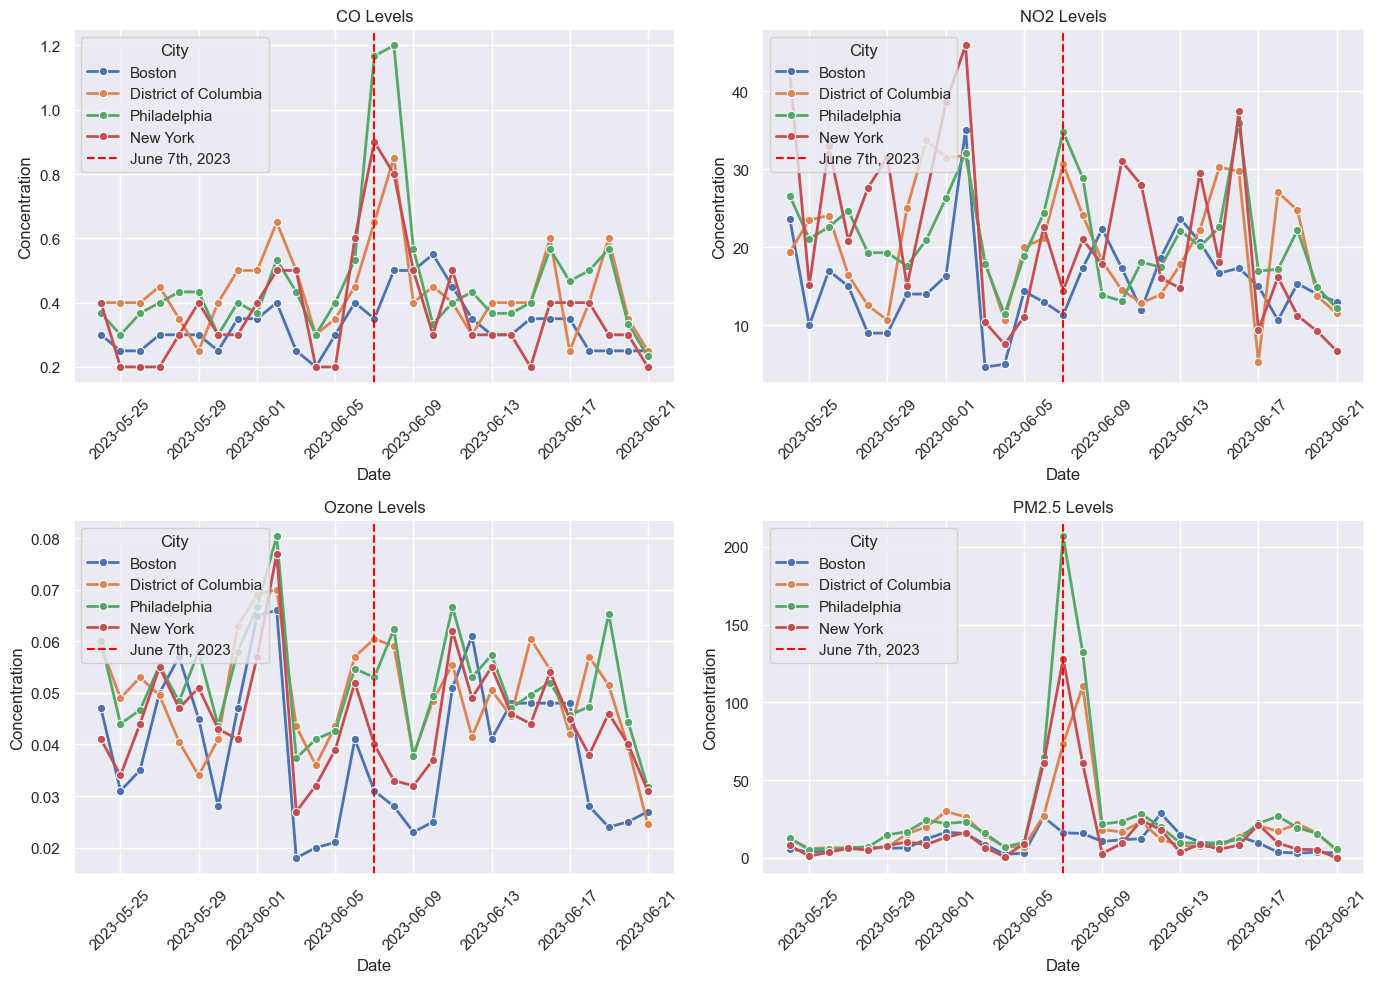

In [8]:
vertical_line_date = pd.Timestamp('2023-06-07')

# unique pollutants and cities
pollutants = combined_data['Pollutant'].unique()
cities = combined_data['County'].unique()

#2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each pollutant and create line sub plots 
for i, pollutant in enumerate(pollutants):
    pollutant_data = combined_data[combined_data['Pollutant'] == pollutant]
    for city in cities:
        city_data = pollutant_data[pollutant_data['County'] == city]
        sns.lineplot(data=city_data, x='Date', y='Concentration', marker='o', linewidth=2, ax=axs[i], label=city, errorbar=None)
    
    axs[i].set_title(f'{pollutant} Levels')
    axs[i].axvline(x=vertical_line_date, color='red', linestyle='--', label='June 7th, 2023')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Concentration')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend(title='City', loc='upper left')

plt.tight_layout()
plt.show()

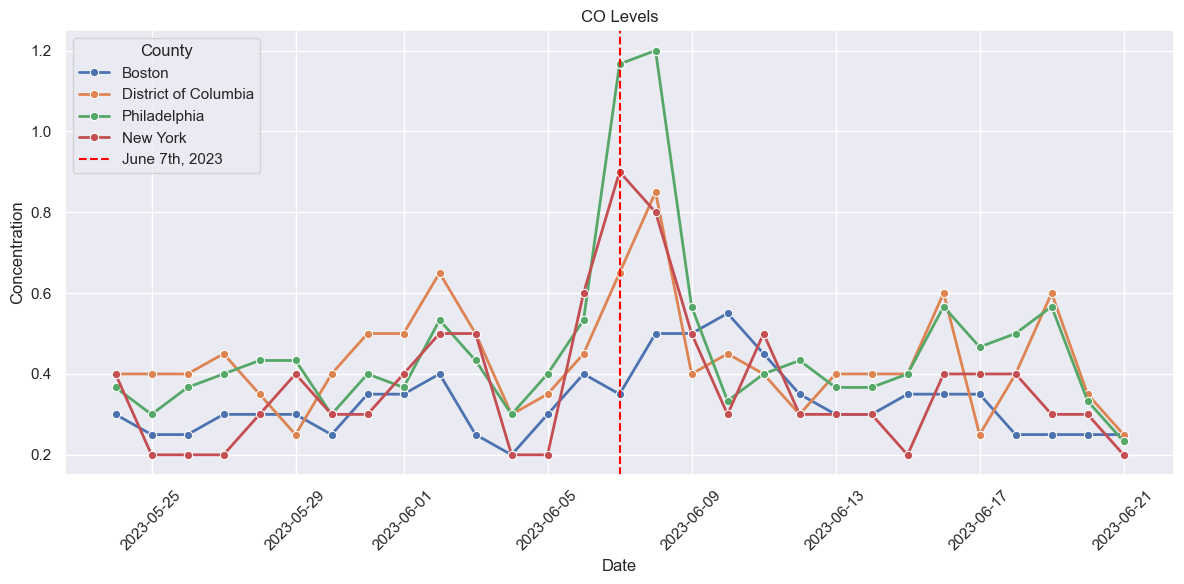

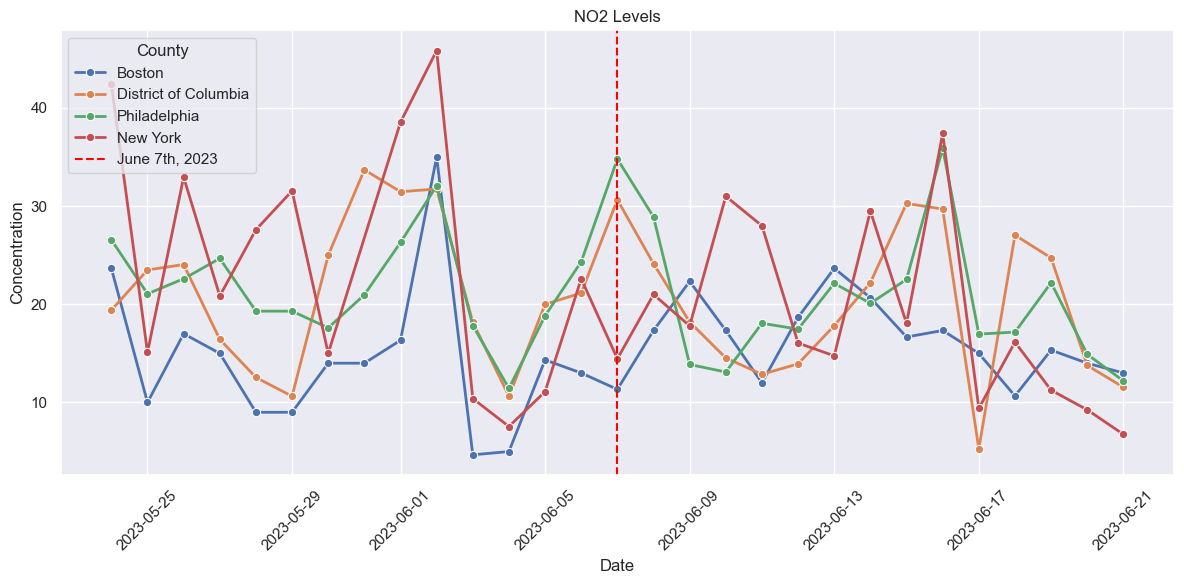

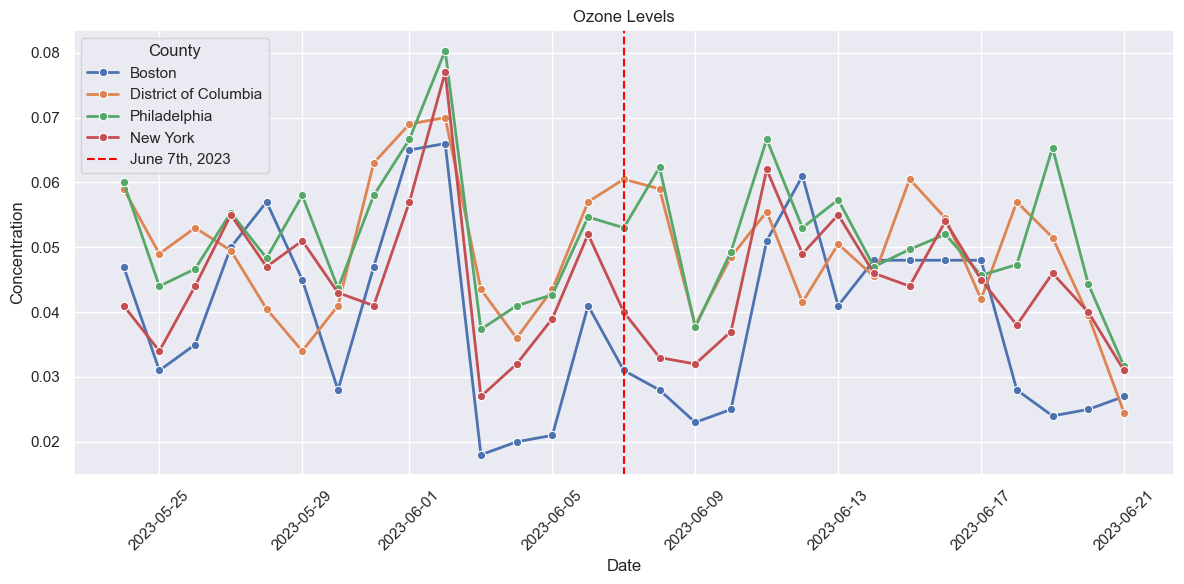

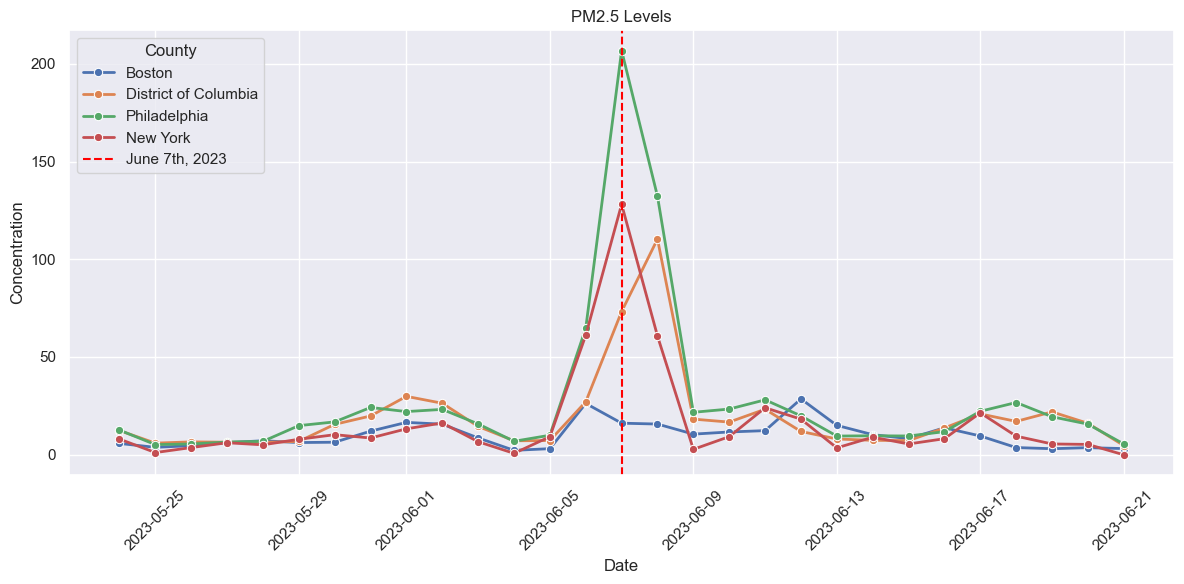

In [9]:
start_date = pd.Timestamp('2023-05-24')
end_date = pd.Timestamp('2023-06-21')
vertical_line_date = pd.Timestamp('2023-06-07')

filtered_data = combined_data[(combined_data['Date'] >= start_date) & (combined_data['Date'] <= end_date)]

pollutants = filtered_data['Pollutant'].unique()
cities = filtered_data['County'].unique()

for pollutant in pollutants:
    plt.figure(figsize=(12, 6))
    pollutant_data = filtered_data[filtered_data['Pollutant'] == pollutant]
    
    for city in cities:
        city_data = pollutant_data[pollutant_data['County'] == city]
        sns.lineplot(data=city_data, x='Date', y='Concentration', marker='o', linewidth=2, label=city, errorbar=None)
    
    plt.title(f'{pollutant} Levels')
    plt.axvline(x=vertical_line_date, color='red', linestyle='--', label='June 7th, 2023')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.xticks(rotation=45)
    plt.legend(title='County', loc='upper left')
    plt.tight_layout()
    plt.show()

In [10]:
# Define the date ranges for the two-week periods before and after June 7th, 2023
before_start_date = pd.Timestamp('2023-05-24')
before_end_date = pd.Timestamp('2023-06-06')
after_start_date = pd.Timestamp('2023-06-07')
after_end_date = pd.Timestamp('2023-06-21')

# Function to calculate changes for each pollutant
def calculate_changes(df, pollutant):
    # Filter data for the two periods
    before_data = df[(df['Date'] >= before_start_date) & (df['Date'] <= before_end_date)]
    after_data = df[(df['Date'] >= after_start_date) & (df['Date'] <= after_end_date)]

    # Calculate mean pollutant levels before and after June 7th
    mean_before = before_data.groupby('County')['Concentration'].mean().reset_index()
    mean_after = after_data.groupby('County')['Concentration'].mean().reset_index()

    # Merge the two datasets to calculate the changes
    change_data = pd.merge(mean_before, mean_after, on='County', suffixes=('_before', '_after'))

    # Calculate the absolute and percentage change
    change_data['Absolute Change'] = change_data['Concentration_after'] - change_data['Concentration_before']
    change_data['Percentage Change (%)'] = (change_data['Absolute Change'] / change_data['Concentration_before']) * 100
    
    change_data['Pollutant'] = pollutant
    
    return change_data

# Calculate changes for each pollutant
co_changes = calculate_changes(co_processed, 'CO')
no2_changes = calculate_changes(no2_processed, 'NO2')
ozone_changes = calculate_changes(ozone_processed, 'Ozone')
pm25_changes = calculate_changes(pm25_processed, 'PM2.5')

all_changes = pd.concat([co_changes, no2_changes, ozone_changes, pm25_changes], ignore_index=True)
all_changes

,County,Concentration_before,Concentration_after,Absolute Change,Percentage Change (%),Pollutant
0,Boston,0.300000,0.356667,0.056667,18.888889,CO
1,District of Columbia,0.421429,0.446667,0.025238,5.988701,CO
2,New York,0.335714,0.406667,0.070952,21.134752,CO
3,Philadelphia,0.397619,0.526667,0.129048,32.455090,CO
4,Boston,14.317073,16.431818,2.114745,14.770791,NO2
5,District of Columbia,20.895455,20.023214,-0.872240,-4.174306,NO2
6,New York,24.734615,18.720000,-6.014615,-24.316592,NO2
7,Philadelphia,21.690244,20.004651,-1.685593,-7.771202,NO2
8,Boston,0.040786,0.037067,-0.003719,-9.118506,Ozone
9,District of Columbia,0.050111,0.048567,-0.001544,-3.082040,Ozone


### CO (Carbon Monoxide)
Increase in concentration across all listed counties, with percentage changes ranging from about 2.54% to 25.22%. This suggests a notable rise in CO levels in the period following June 7th compared to the preceding two weeks.

### NO2 (Nitrogen Dioxide)
In District of Columbia and Philadelphia, NO2 levels decreased significantly (around 8.09% to 11.10% decrease), suggesting improved air quality regarding NO2 pollution. Conversely, Suffolk County experienced an increase of approximately 11.05% in NO2 concentration.

### Ozone
Slight decrease in Ozone levels in most counties, with changes ranging from a decrease of about 3.29% to 4.78%, except in Suffolk where there was a slight increase (4.30%). This indicates a relatively stable but slightly declining trend in Ozone levels.

### PM2.5 (Particulate Matter <2.5 μm)
Significant increases observed in all counties, with percentage changes ranging dramatically from 70.76% to 121.41%. This shows a substantial escalation in PM2.5 pollution post-June 7th.

C:\Users\741mp\AppData\Local\Temp\ipykernel_18572\3554653836.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{row['County']} ({row['Percentage Change (%)']:.2f}%)" for _, row in pollutant_data.iterrows()], ha='right')


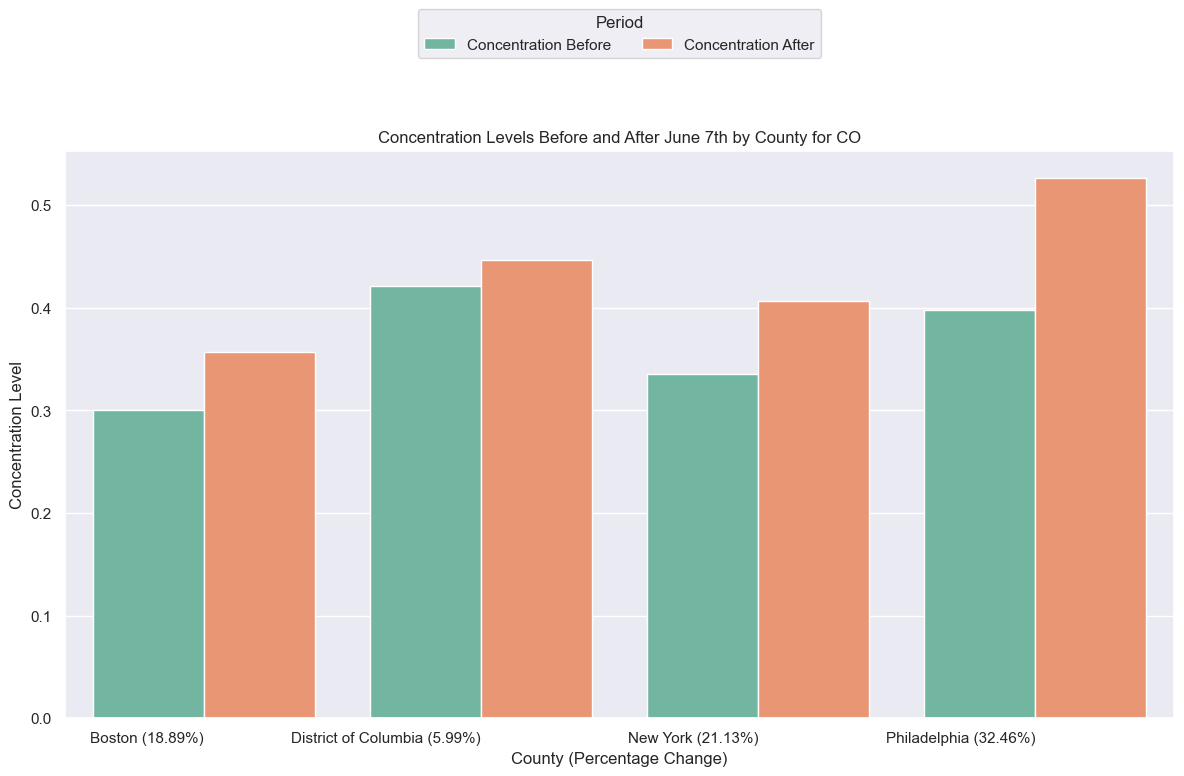

C:\Users\741mp\AppData\Local\Temp\ipykernel_18572\3554653836.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{row['County']} ({row['Percentage Change (%)']:.2f}%)" for _, row in pollutant_data.iterrows()], ha='right')


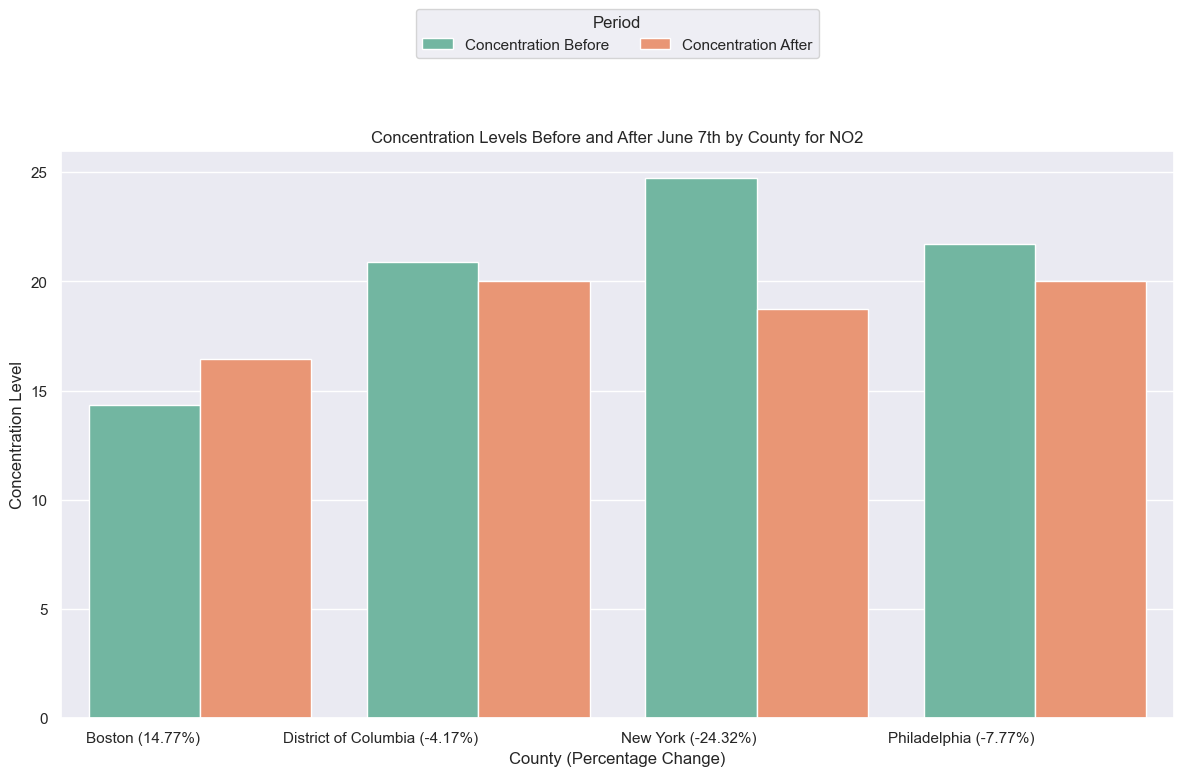

C:\Users\741mp\AppData\Local\Temp\ipykernel_18572\3554653836.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{row['County']} ({row['Percentage Change (%)']:.2f}%)" for _, row in pollutant_data.iterrows()], ha='right')


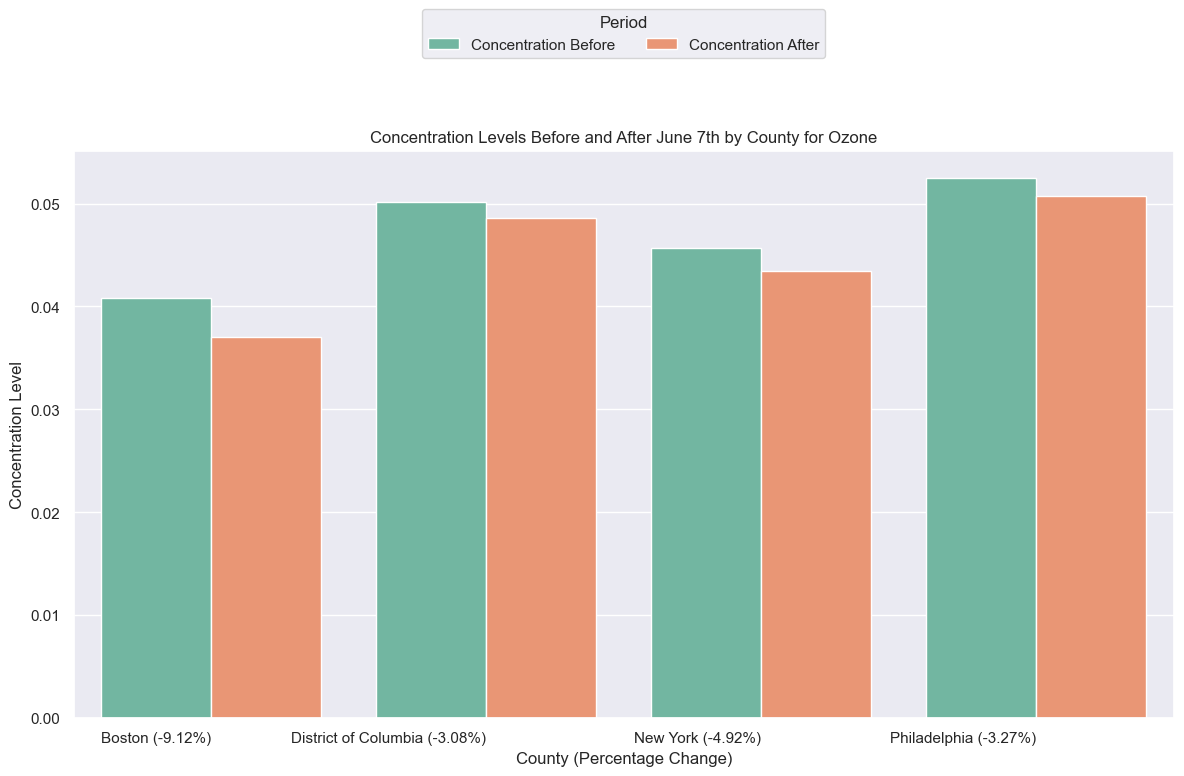

C:\Users\741mp\AppData\Local\Temp\ipykernel_18572\3554653836.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{row['County']} ({row['Percentage Change (%)']:.2f}%)" for _, row in pollutant_data.iterrows()], ha='right')


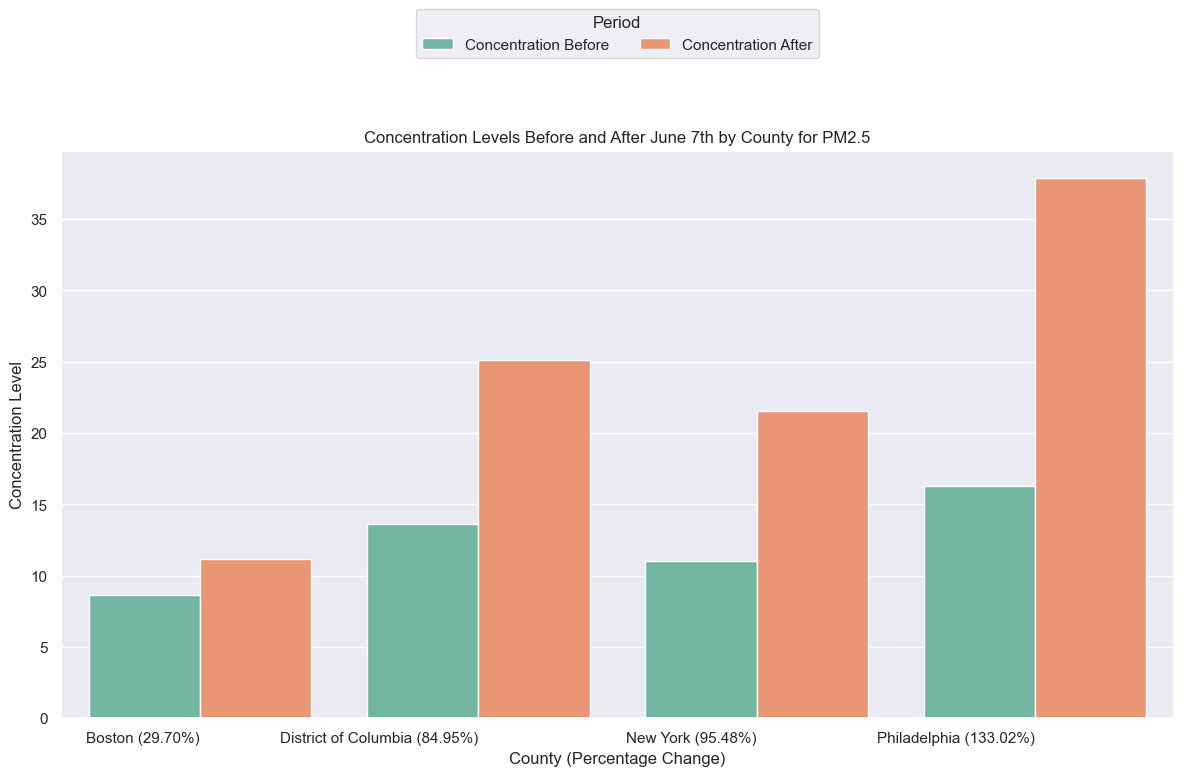

In [11]:
# Loop through each pollutant and create a single plot
for pollutant in all_changes['Pollutant'].unique():
    pollutant_data = all_changes[all_changes['Pollutant'] == pollutant]

    # Rename columns for better legend display
    pollutant_data = pollutant_data.rename(columns={
        'Concentration_before': 'Concentration Before',
        'Concentration_after': 'Concentration After'
    })

    melted_data = pollutant_data.melt(id_vars='County', 
                                      value_vars=['Concentration Before', 'Concentration After'], 
                                      var_name='Period', value_name='Concentration')

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=melted_data, x='County', y='Concentration', hue='Period', palette='Set2', errorbar=None)

    ax.set_xticklabels([f"{row['County']} ({row['Percentage Change (%)']:.2f}%)" for _, row in pollutant_data.iterrows()], ha='right')

    plt.title(f'Concentration Levels Before and After June 7th by County for {pollutant}')
    plt.ylabel('Concentration Level')
    plt.xlabel('County (Percentage Change)')
    ax.legend(title='Period', loc='lower center', bbox_to_anchor=(0.5, 1.15), ncol=2)

    plt.tight_layout()
    plt.show()

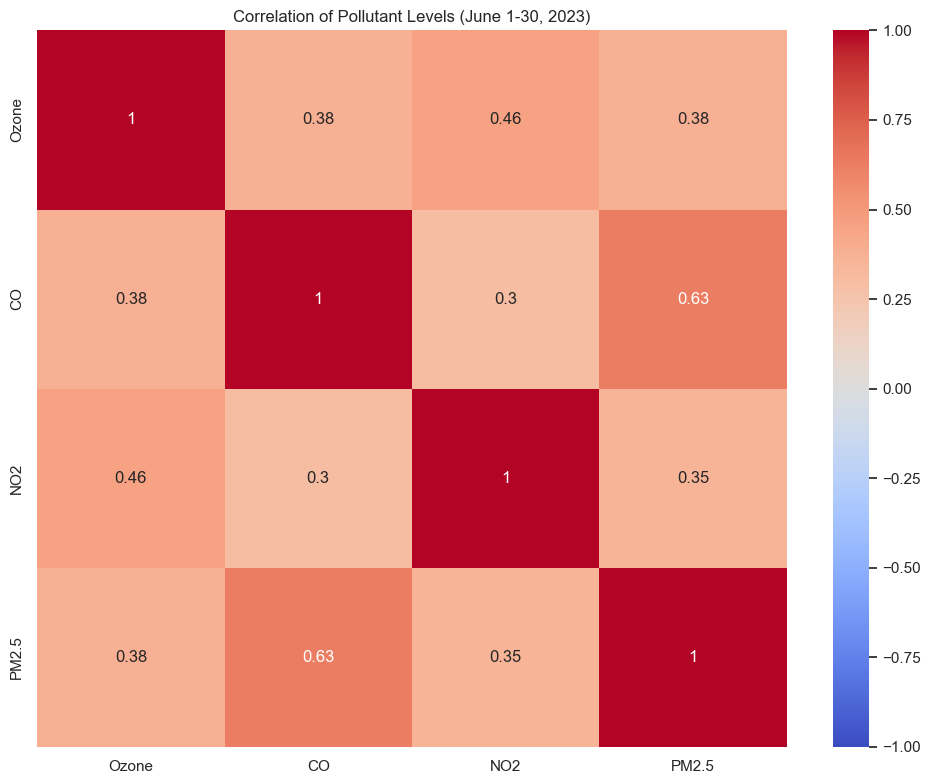

In [13]:
# Dictionary to map pollutant names to their concentration column names
concentration_columns = {
    'Ozone': 'Daily Max 8-hour Ozone Concentration',
    'CO': 'Daily Max 8-hour CO Concentration',
    'NO2': 'Daily Max 1-hour NO2 Concentration',
    'PM2.5': 'Daily Mean PM2.5 Concentration'
}

# Function to load and preprocess data
def load_and_preprocess(file_path, pollutant_name):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[(df['Date'] >= '2023-06-01') & (df['Date'] <= '2023-06-30')]
    concentration_column = concentration_columns[pollutant_name]
    df = df[['Date', 'County', concentration_column]]
    df = df.rename(columns={concentration_column: pollutant_name})
    return df

# Load data
ozone_data = load_and_preprocess('./Data/EPA/OZONE/combined_ozone_data.csv', 'Ozone')
co_data = load_and_preprocess('./Data/EPA/CO/combined_co_data.csv', 'CO')
no2_data = load_and_preprocess('./Data/EPA/NO2/combined_no2_data.csv', 'NO2')
pm25_data = load_and_preprocess('./Data/EPA/PM2.5/combined_pm2.5_data.csv', 'PM2.5')

# Merge datasets
merged_data = ozone_data.merge(co_data, on=['Date', 'County'], how='outer')
merged_data = merged_data.merge(no2_data, on=['Date', 'County'], how='outer')
merged_data = merged_data.merge(pm25_data, on=['Date', 'County'], how='outer')

correlation_matrix = merged_data[['Ozone', 'CO', 'NO2', 'PM2.5']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Pollutant Levels (June 1-30, 2023)')
plt.tight_layout()
plt.show()

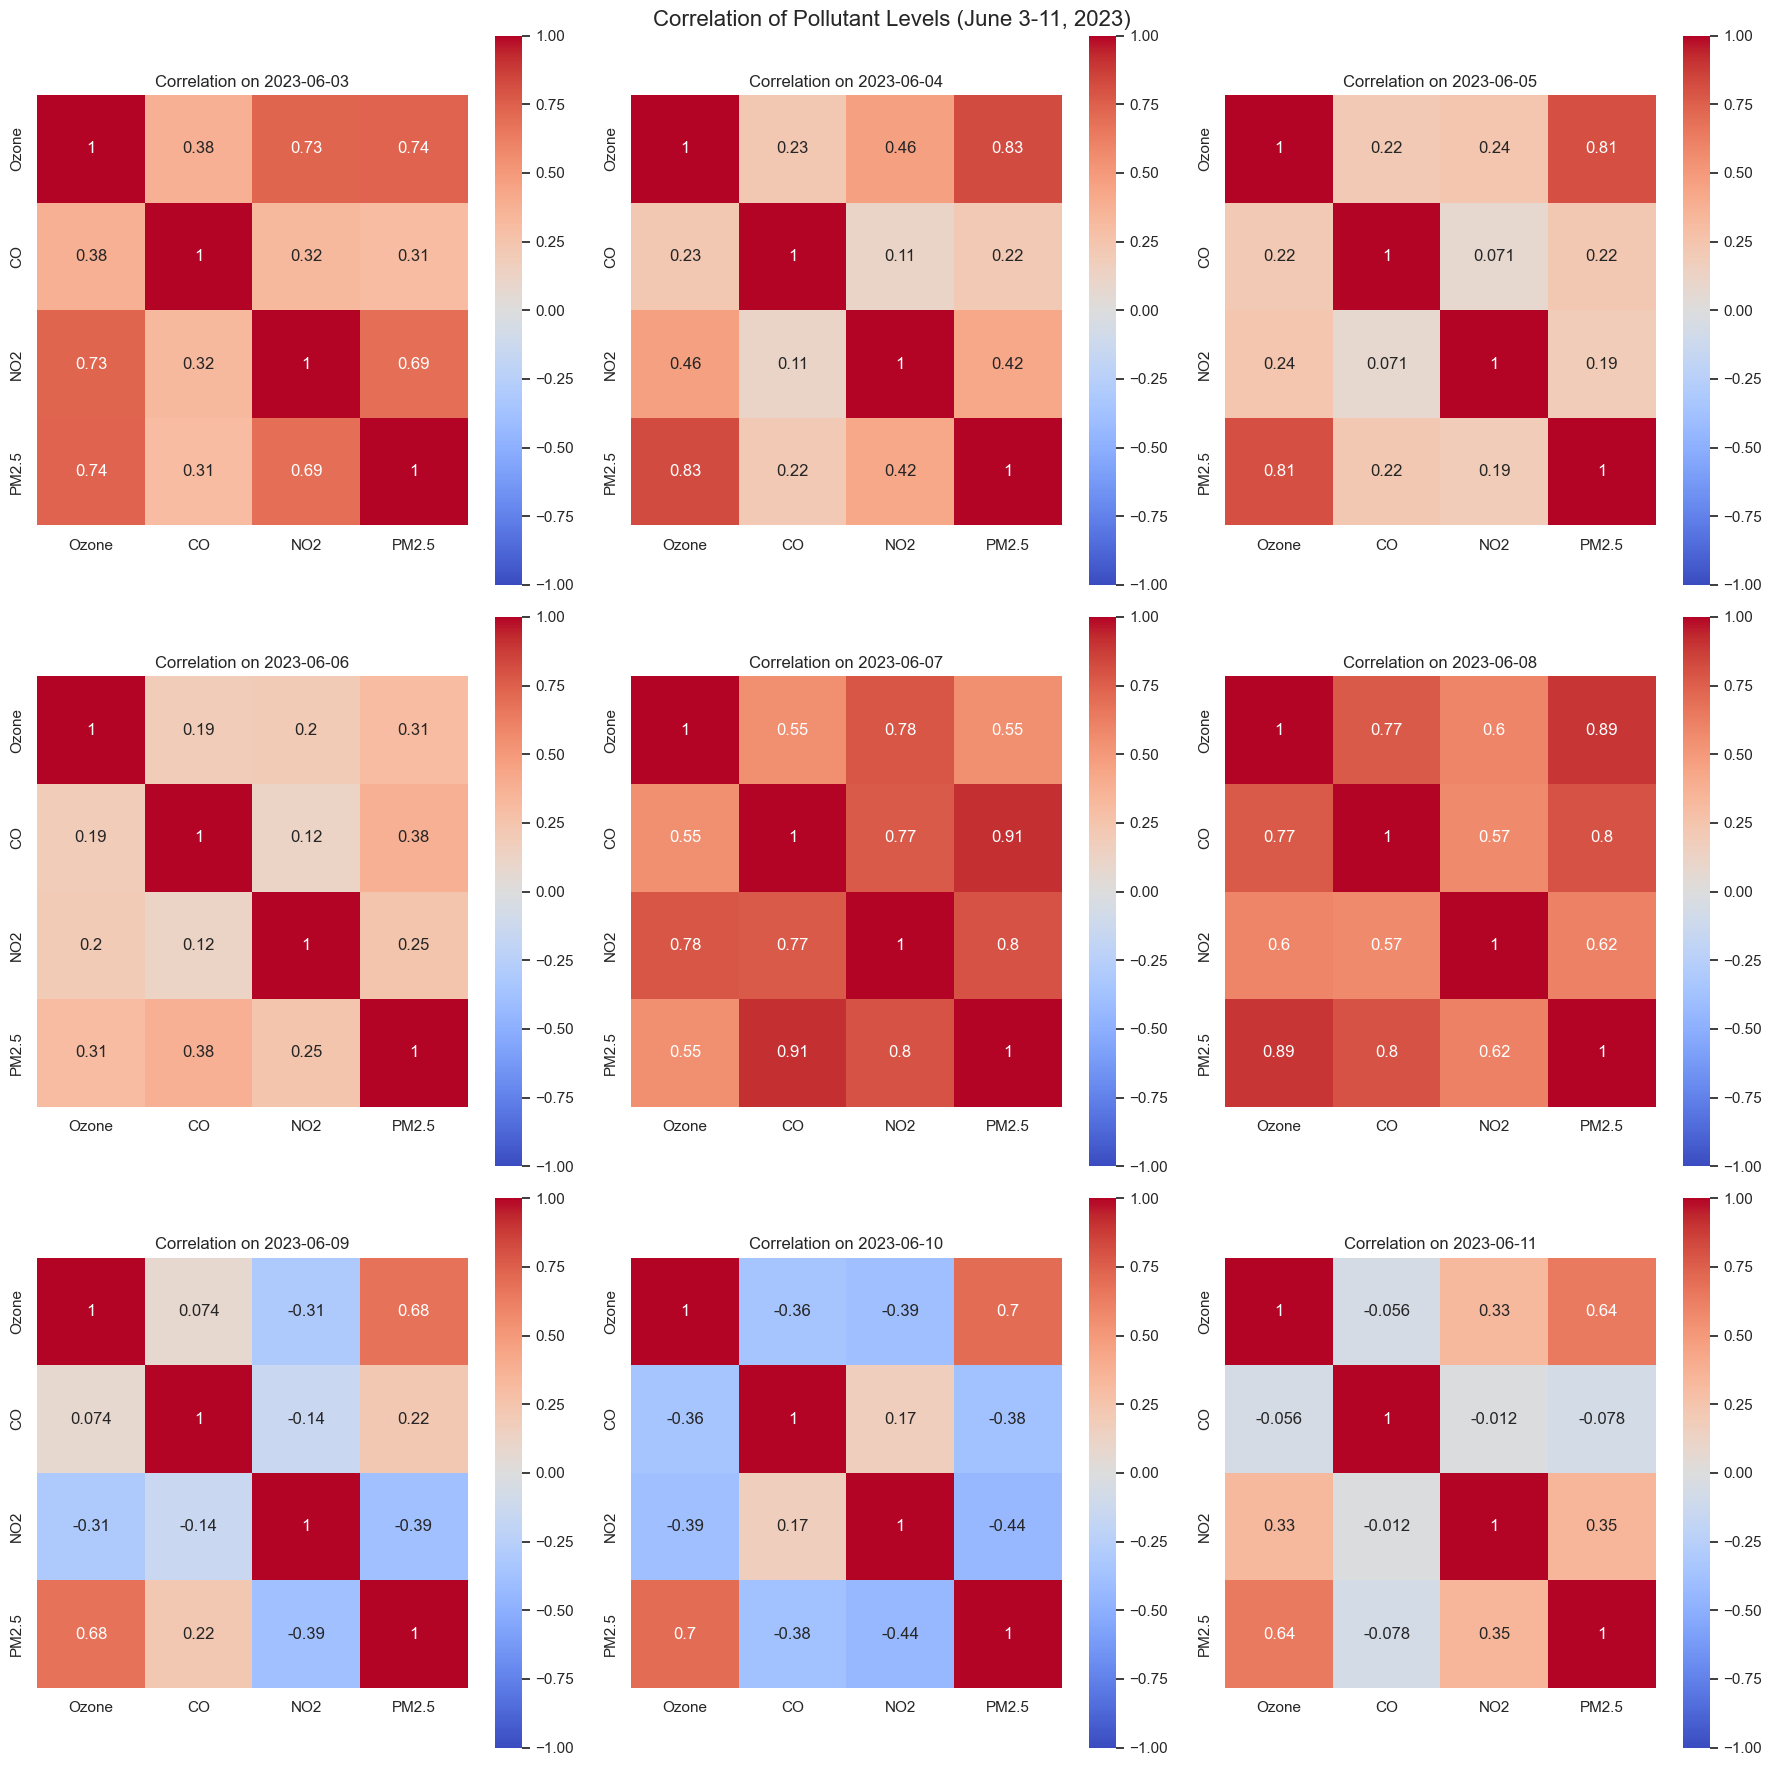

In [14]:
# Function to load and preprocess data
def load_and_preprocess(file_path, pollutant_name):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[(df['Date'] >= '2023-06-03') & (df['Date'] <= '2023-06-11')]
    concentration_column = concentration_columns[pollutant_name]
    df = df[['Date', 'County', concentration_column]]
    df = df.rename(columns={concentration_column: pollutant_name})
    return df

# 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Correlation of Pollutant Levels (June 3-11, 2023)', fontsize=16)

for i, date in enumerate(pd.date_range(start='2023-06-03', end='2023-06-11')):
    date_data = merged_data[merged_data['Date'] == date]
    
    # correlations
    correlation_matrix = date_data[['Ozone', 'CO', 'NO2', 'PM2.5']].corr()
    
    # correlations
    row = i // 3
    col = i % 3
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[row, col], square=True)
    axes[row, col].set_title(f'Correlation on {date.date()}')

plt.tight_layout()
plt.show()